In [29]:
# libraries

from sklearn.datasets import load_iris , make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np

In [5]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
x = iris.data
y = iris.target 

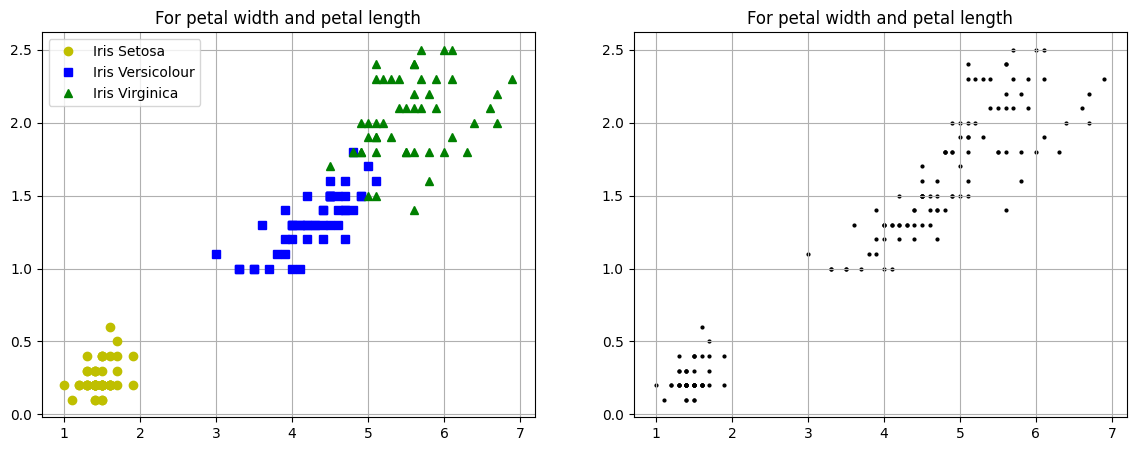

In [28]:
def plot_iris(x , y):

    fig , ax = plt.subplots(ncols = 2 , nrows=1 , figsize=(14 , 5))
    ax[0].plot(x[y == 0 , 2] , x[y == 0 , 3] , "yo" , label="Iris Setosa")
    ax[0].plot(x[y == 1 , 2] , x[y == 1 , 3] , "bs" , label="Iris Versicolour")
    ax[0].plot(x[y == 2 , 2] , x[y == 2 , 3] , "g^" , label="Iris Virginica")
    ax[0].grid()
    ax[0].legend(loc="upper left")
    ax[0].set_title("For petal width and petal length")
    
    ax[1].scatter(x[: , 2] , x[: , 3] , c="k" , s=4)
    ax[1].grid()
    ax[1].set_title("For petal width and petal length")
    
    
    plt.show()
    
    
plot_iris(x , y)

In [62]:
# k means clustering on the make blobs dataset

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
x, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

In [63]:
x.shape , y.shape

((2000, 2), (2000,))

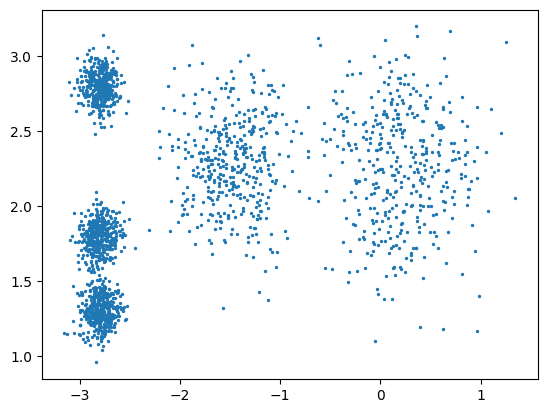

In [64]:
plt.scatter(x[: , 0] , x[: , 1] , s=2)
plt.show()

In [77]:
k = 5
kmeans = KMeans(n_clusters=k , n_init=50 , random_state=42)
y_pred = kmeans.fit_predict(x)

In [78]:
y_pred

array([0, 4, 1, ..., 3, 1, 4], shape=(2000,), dtype=int32)

In [79]:
# cluster center

kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

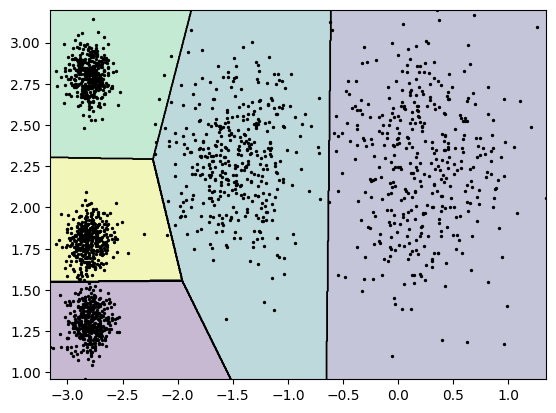

In [84]:
def decision_boundary(kmeans , x , y ):
    
    x1_new = np.linspace(x[: , 0].min() - 0.5 , x[: , 0].max() + 0.5 , 1000)
    x2_new = np.linspace(x[: , 1].min() - 0.5 , x[: , 1].max() + 0.5 , 1000)
    
    x_grid , y_grid = np.meshgrid(x1_new , x2_new)
    final_points = np.c_[x_grid.ravel() , y_grid.ravel()]
    
    y_pred = kmeans.predict(final_points).reshape(x_grid.shape)

    plt.contourf(x_grid , y_grid , y_pred , alpha=0.3)
    plt.contour(x_grid , y_grid , y_pred  , colors='k' , linewidths=1)
    plt.scatter(x[: , 0] , x[: , 1] , c="k" , s=2)
    plt.axis([x[: , 0].min() , x[: , 0].max() , x[: , 1].min() , x[: , 1].max()])
    plt.show()
    

kmeans = KMeans(n_clusters=5 , n_init=50 ,  random_state=42)
kmeans.fit(x)
decision_boundary(kmeans , x ,y )


In [85]:
# above was eg of hard cluseting 

In [86]:
x1_new = np.linspace(x[: , 0].min() - 0.5 , x[: , 0].max() + 0.5 , 1000)
x2_new = np.linspace(x[: , 1].min() - 0.5 , x[: , 1].max() + 0.5 , 1000)

x_grid , y_grid = np.meshgrid(x1_new , x2_new)
final_points = np.c_[x_grid.ravel() , y_grid.ravel()]


# soft clustering mesure distance from each centroid

kmeans.transform(final_points).round(2)

array([[1.2 , 4.26, 2.85, 2.49, 1.59],
       [1.19, 4.25, 2.85, 2.49, 1.59],
       [1.19, 4.25, 2.84, 2.49, 1.58],
       ...,
       [5.22, 2.17, 3.59, 4.71, 5.01],
       [5.22, 2.18, 3.6 , 4.72, 5.02],
       [5.23, 2.18, 3.6 , 4.72, 5.02]], shape=(1000000, 5))